<a href="https://colab.research.google.com/github/AbiramiMuthu/TensorFlow-TimeSeries-LSTM-Google_Market_price_Prediction/blob/main/TF_LSTM_Google_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Google_Stock_Price_Prediction/GOOG.csv",date_parser=True)
data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [ ]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
4263,2021-07-27,2800.219971,2800.219971,2702.000000,2735.929932,2735.929932,2108200
4264,2021-07-28,2771.239990,2793.520020,2727.000000,2727.629883,2727.629883,2734400
4265,2021-07-29,2727.612061,2743.030029,2722.760010,2730.810059,2730.810059,964200
4266,2021-07-30,2710.219971,2715.427002,2696.283936,2704.419922,2704.419922,1196600
4267,2021-08-02,2709.689941,2720.409912,2693.389893,2719.790039,2719.790039,1006000


In [ ]:
data_train_old=data[data["Date"]<"2019-01-01"].copy()
len(data_train)

3617

In [ ]:
data_test=data[data["Date"]>="2019-01-01"].copy()
len(data_test)

651

In [ ]:
# Drop the Date and Adj Close columns
data_train=data_train_old.drop(["Date","Adj Close"],axis=1)
data_train.head(3)

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897


## Data Standardisation

In [ ]:
scaler=MinMaxScaler()
data_train=scaler.fit_transform(data_train)
data_train

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577158e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22151352e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79972283e-02]])

## we need to crate X_train as batches of 60 days
#### it starts with 60 th days, to find the 60th day we need the rows from 0-59
#### for the 61st day we need the rows from 1-60
### so we need to create similar batchces and store it in x_train
### for Y_train 60 th day we should store the 60th day "Open" column value

In [ ]:
X_train=[]
Y_train=[]

In [ ]:
type(X_train)

list

In [ ]:
for i in range(60,data_train.shape[0]):
  X_train.append(data_train[i-60:i])# for 60th row 0-59
  Y_train.append(data_train[i,0])
  

In [ ]:
X_train[0].shape,X_train[1].shape

((60, 5), (60, 5))

In [ ]:
Y_train[0]

0.03508488283148054

In [ ]:
#Convert X_train and Y_train to numpy array
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [ ]:
X_train.shape,Y_train.shape

((3557, 60, 5), (3557,))

In [ ]:
#The data is splitted into 3557 batches each with 60 rows and 5 columns

In [ ]:
X_train.shape[0]

3557

In [ ]:
X_train[0].shape

(60, 5)

## Build the Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
regression_model=Sequential()
regression_model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=X_train[0].shape))
regression_model.add(Dropout(0.2))

regression_model.add(LSTM(units=60,activation='relu',return_sequences=True))
regression_model.add(Dropout(0.2))

regression_model.add(LSTM(units=80,activation='relu',return_sequences=True))
regression_model.add(Dropout(0.2))

regression_model.add(LSTM(units=120,activation='relu'))
regression_model.add(Dropout(0.2))

regression_model.add(Dense(1))

In [ ]:
regression_model.compile(optimizer='adam',loss="mean_squared_error")

## Model Training

In [ ]:
regression_model.fit(X_train,Y_train,epochs=10,batch_size=32)

Epoch 1/10
112/112 [==============================] - 20s 141ms/step - loss: 0.0125
Epoch 2/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0022
Epoch 3/10
112/112 [==============================] - 16s 141ms/step - loss: 0.0023
Epoch 4/10
112/112 [==============================] - 16s 141ms/step - loss: 0.0020
Epoch 5/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0018
Epoch 6/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0016
Epoch 7/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0017
Epoch 8/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0014
Epoch 9/10
112/112 [==============================] - 16s 139ms/step - loss: 0.0013
Epoch 10/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0014


## Preparing Testdata for Prediction

In [ ]:
# To predict the first data in test data, we need the previous 60 days data, so we need to select those last 60 days of training data and append to test data

df_last=data_train_old.tail(60)

In [ ]:
df_last.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.51001,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.50000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.00000,1127.364014,1148.969971,1148.969971,1932400


In [ ]:
df_last=df_last.drop(["Date","Adj Close"],axis=1)
df_test=data_test.drop(["Date","Adj Close"],axis=1)

In [ ]:
df_test.head(2)

,Open,High,Low,Close,Volume
0,1195.329956,1197.51001,1155.576050,1168.189941,2209500
1,1167.500000,1173.50000,1145.119995,1157.349976,1184300


In [ ]:
df_test=df_last.append(df_test,ignore_index=True)

## Scaling

In [ ]:
test_new=scaler.transform(df_test)
test_new

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.02667489],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.0142533 ],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331748],
       ...,
       [2.1923901 , 2.201053  , 2.22687017, 2.20021836, 0.01158651],
       [2.17815285, 2.17848694, 2.20482917, 2.17856068, 0.01440233],
       [2.17771896, 2.18256058, 2.20241991, 2.19117453, 0.01209297]])

In [ ]:
type(test_new)

numpy.ndarray

In [ ]:
#convert the test_data into batches each having 60 days
X_test=[]
Y_test=[]
for i in range(60,test_new.shape[0]):
  X_test.append(test_new[i-60:i])
  Y_test.append(test_new[i,0])

X_test=np.array(X_test)
Y_test=np.array(Y_test)

X_test.shape,Y_test.shape


((771, 60, 5), (771,))

## Prediction

In [ ]:
y_pred=regression_model.predict(X_test)

## Reverse Scaling

In [ ]:
#0 bcoz 1st column has to be predicted
scale=scaler.scale_[0]
scale

0.0008186051270046249

In [ ]:
scale=1/scale

In [ ]:
scale

1221.590199

In [ ]:
y_pred=y_pred*scale
Y_test=Y_test*scale

## Visualization

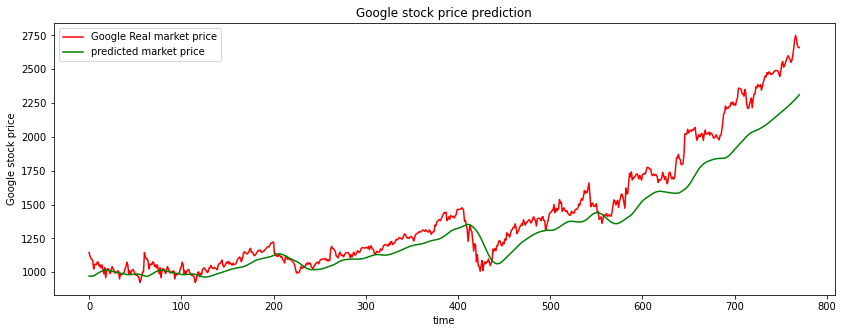

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test,color="red",label="Google Real market price")
plt.plot(y_pred,color="green",label="predicted market price")
plt.title("Google stock price prediction")
plt.xlabel("time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()